# Create Shepp-Logan phantom function in Fenics

### Original values from:

https://en.wikipedia.org/wiki/Shepp%E2%80%93Logan_phantom

### Modified values from:

Toft, PA, "The Radon Transform - Theory and Implementation", PhD dissertation, Departement of Mathematical Modelling, Technical University of Denmark (1996), page 201, https://core.ac.uk/download/pdf/13746920.pdf

In [1]:
import numpy as np
from fenics import *
import matplotlib.pyplot as plt

In [2]:
ellipse_centers = np.array([[0., 0.],
                            [0., -0.0184],
                            [0.22, 0.],
                            [-0.22, 0.],
                            [0., 0.35],
                            [0., 0.1],
                            [0., -0.1],
                            [-0.08, -0.605],
                            [0., -0.605],
                            [0.06, -0.605]])

major_axis_lengths = np.array([0.69, 0.6624, 0.11, 0.16, 0.21, 0.046, 0.046, 0.046, 0.023, 0.023])

minor_axis_lengths = np.array([0.92, 0.874, 0.31, 0.41, 0.25, 0.046, 0.046, 0.023, 0.023, 0.046])

thetas_in_degrees = np.array([0., 0., -18., 18., 0., 0., 0., 0., 0., 0.])

# gray_levels = np.array([2., -0.98, -0.02, -0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]) # <-- original
gray_levels = np.array([1., -0.8, -0.2, -0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) # <-- modified

In [3]:
num_ellipses = len(gray_levels)

thetas = (np.pi / 180.) * thetas_in_degrees # radians

# major and minor axes of the ellipsoids
major_vv = np.array([np.cos(thetas), np.sin(thetas)]).T
minor_vv = np.array([major_vv[:,1], -major_vv[:,0]]).T

# eigenvector (P) and eigenvalue (D) matrices for the inverse covariance matrices (iC)
PP = [np.array([major_vv[k,:], minor_vv[k,:]]).T for k in range(num_ellipses)] 
DD = [np.diag([1./major_axis_lengths[k]**2, 1./minor_axis_lengths[k]**2]) for k in range(num_ellipses)]
iCC = [np.dot(P,np.dot(D, P.T)) for P, D in zip(PP,DD)]

def points_in_ellipse(X, iC, x0):
    dX = X - x0.reshape((1,-1))
    return np.sum(dX.T * np.dot(iC, dX.T), axis=0) < 1.

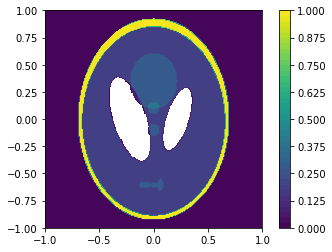

In [4]:
mesh_n = 200
mesh = RectangleMesh(Point(-1., -1.), Point(1., 1.), mesh_n, mesh_n)
V = FunctionSpace(mesh, 'CG', 1)
X = V.tabulate_dof_coordinates()

Shepp_Logan_phantom = Function(V)
for k in range(num_ellipses):
    iC = iCC[k]
    x0 = ellipse_centers[k,:]
    a = gray_levels[k]
    Shepp_Logan_phantom.vector()[:] += a * points_in_ellipse(X, iC, x0)

cm = plot(Shepp_Logan_phantom)
plt.colorbar(cm)